<a href="https://colab.research.google.com/github/arqueiroz-rc/analiseacoes/blob/main/An%C3%A1lise_a%C3%A7%C3%B5es_empresas_de_tecnologia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [103]:
!pip install yfinance

## Importação das bibliotecas

In [104]:
import pandas as pd
import numpy as np
from pandas_datareader import data
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import yfinance as yf

## Base de dados

In [105]:
acoes = ['TOTS3.SA', 'VLID3.SA', 'LWSA3.SA', 'POSI3.SA', 'LVTC3.SA', 'NINJ3.SA']

In [106]:
acoes_df = pd.DataFrame()
for acao in acoes:
  acoes_df[acao] = yf.download(acao, start='2022-01-01')['Close']

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [107]:
acoes_df

,TOTS3.SA,VLID3.SA,LWSA3.SA,POSI3.SA,LVTC3.SA,NINJ3.SA
Date,,,,,,
2022-01-03,27.500000,8.40,12.75,10.50,15.891783,5.23
2022-01-04,26.389999,8.33,11.89,9.90,14.102708,5.15
2022-01-05,25.219999,8.28,10.37,9.04,13.912807,4.91
2022-01-06,26.000000,7.66,10.14,8.56,13.762884,4.81
2022-01-07,25.100000,8.00,9.91,8.24,14.082719,4.79
...,...,...,...,...,...,...
2024-06-10,28.540001,15.38,4.19,8.82,3.690000,4.50
2024-06-11,29.100000,16.10,4.30,8.85,3.520000,4.58
2024-06-12,29.000000,15.70,4.13,8.85,3.490000,4.58


In [108]:
acoes_df = acoes_df.rename(columns={'TOTS3.SA': 'TOTVS', 'VLID3.SA': 'VALID', 'LWSA3.SA': 'LOCAWEB',
                                    'POSI3.SA': 'POSITIVO', 'LVTC3.SA': 'LIVETECH', 'NINJ3.SA': 'GETNINJAS'})



In [109]:
acoes_df.columns[0:]

Index(['TOTVS', 'VALID', 'LOCAWEB', 'POSITIVO', 'LIVETECH', 'GETNINJAS'], dtype='object')

In [110]:
acoes_df.head()

,TOTVS,VALID,LOCAWEB,POSITIVO,LIVETECH,GETNINJAS
Date,,,,,,
2022-01-03,27.500000,8.40,12.75,10.50,15.891783,5.23
2022-01-04,26.389999,8.33,11.89,9.90,14.102708,5.15
2022-01-05,25.219999,8.28,10.37,9.04,13.912807,4.91
2022-01-06,26.000000,7.66,10.14,8.56,13.762884,4.81
2022-01-07,25.100000,8.00,9.91,8.24,14.082719,4.79


In [111]:
acoes_df.isnull().sum()

TOTVS        0
VALID        0
LOCAWEB      0
POSITIVO     0
LIVETECH     0
GETNINJAS    0
dtype: int64

In [112]:
acoes_df.shape

(612, 6)

In [113]:
acoes_df.dropna(inplace=True)

In [114]:
acoes_df.shape

(612, 6)

In [115]:
acoes_df.isnull().sum()

TOTVS        0
VALID        0
LOCAWEB      0
POSITIVO     0
LIVETECH     0
GETNINJAS    0
dtype: int64

In [116]:
acoes_df.to_csv('acoes.csv')

In [117]:
acoes_df = pd.read_csv('acoes.csv')
acoes_df

,Date,TOTVS,VALID,LOCAWEB,POSITIVO,LIVETECH,GETNINJAS
0,2022-01-03,27.500000,8.40,12.75,10.50,15.891783,5.23
1,2022-01-04,26.389999,8.33,11.89,9.90,14.102708,5.15
2,2022-01-05,25.219999,8.28,10.37,9.04,13.912807,4.91
3,2022-01-06,26.000000,7.66,10.14,8.56,13.762884,4.81
4,2022-01-07,25.100000,8.00,9.91,8.24,14.082719,4.79
...,...,...,...,...,...,...,...
607,2024-06-10,28.540001,15.38,4.19,8.82,3.690000,4.50
608,2024-06-11,29.100000,16.10,4.30,8.85,3.520000,4.58
609,2024-06-12,29.000000,15.70,4.13,8.85,3.490000,4.58
610,2024-06-13,29.590000,15.47,4.12,8.82,3.390000,4.60


In [118]:
acoes_df.columns[1:]

Index(['TOTVS', 'VALID', 'LOCAWEB', 'POSITIVO', 'LIVETECH', 'GETNINJAS'], dtype='object')

In [119]:
acoes_df.describe()

,TOTVS,VALID,LOCAWEB,POSITIVO,LIVETECH,GETNINJAS
count,612.000000,612.000000,612.000000,612.000000,612.000000,612.000000
mean,29.181291,13.245392,7.064330,8.283415,6.723216,3.757451
std,2.673128,4.139321,1.775558,1.621025,3.235795,0.901382
min,23.200001,7.660000,4.100000,5.430000,3.360000,2.160000
25%,27.510000,9.742500,5.700000,7.100000,4.157500,2.900000
50%,28.955000,10.810000,6.610000,8.055000,5.795000,3.700000
75%,30.840000,17.002500,8.497500,9.000000,7.652500,4.600000
max,37.500000,22.340000,12.750000,13.380000,16.719999,5.230000


## Visualização

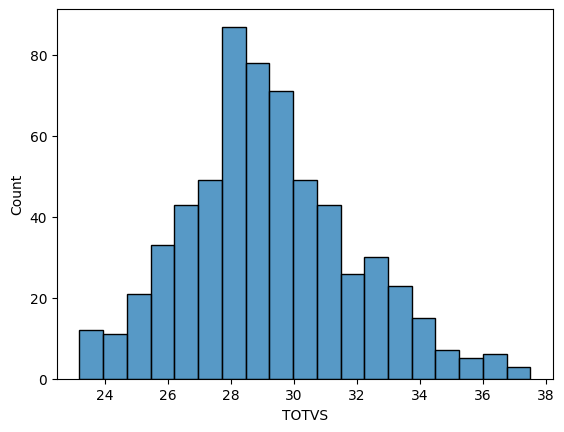

In [120]:
sns.histplot(acoes_df['TOTVS']);

In [121]:
len(acoes_df.columns)

7

In [122]:
np.arange(1, len(acoes_df.columns))

array([1, 2, 3, 4, 5, 6])

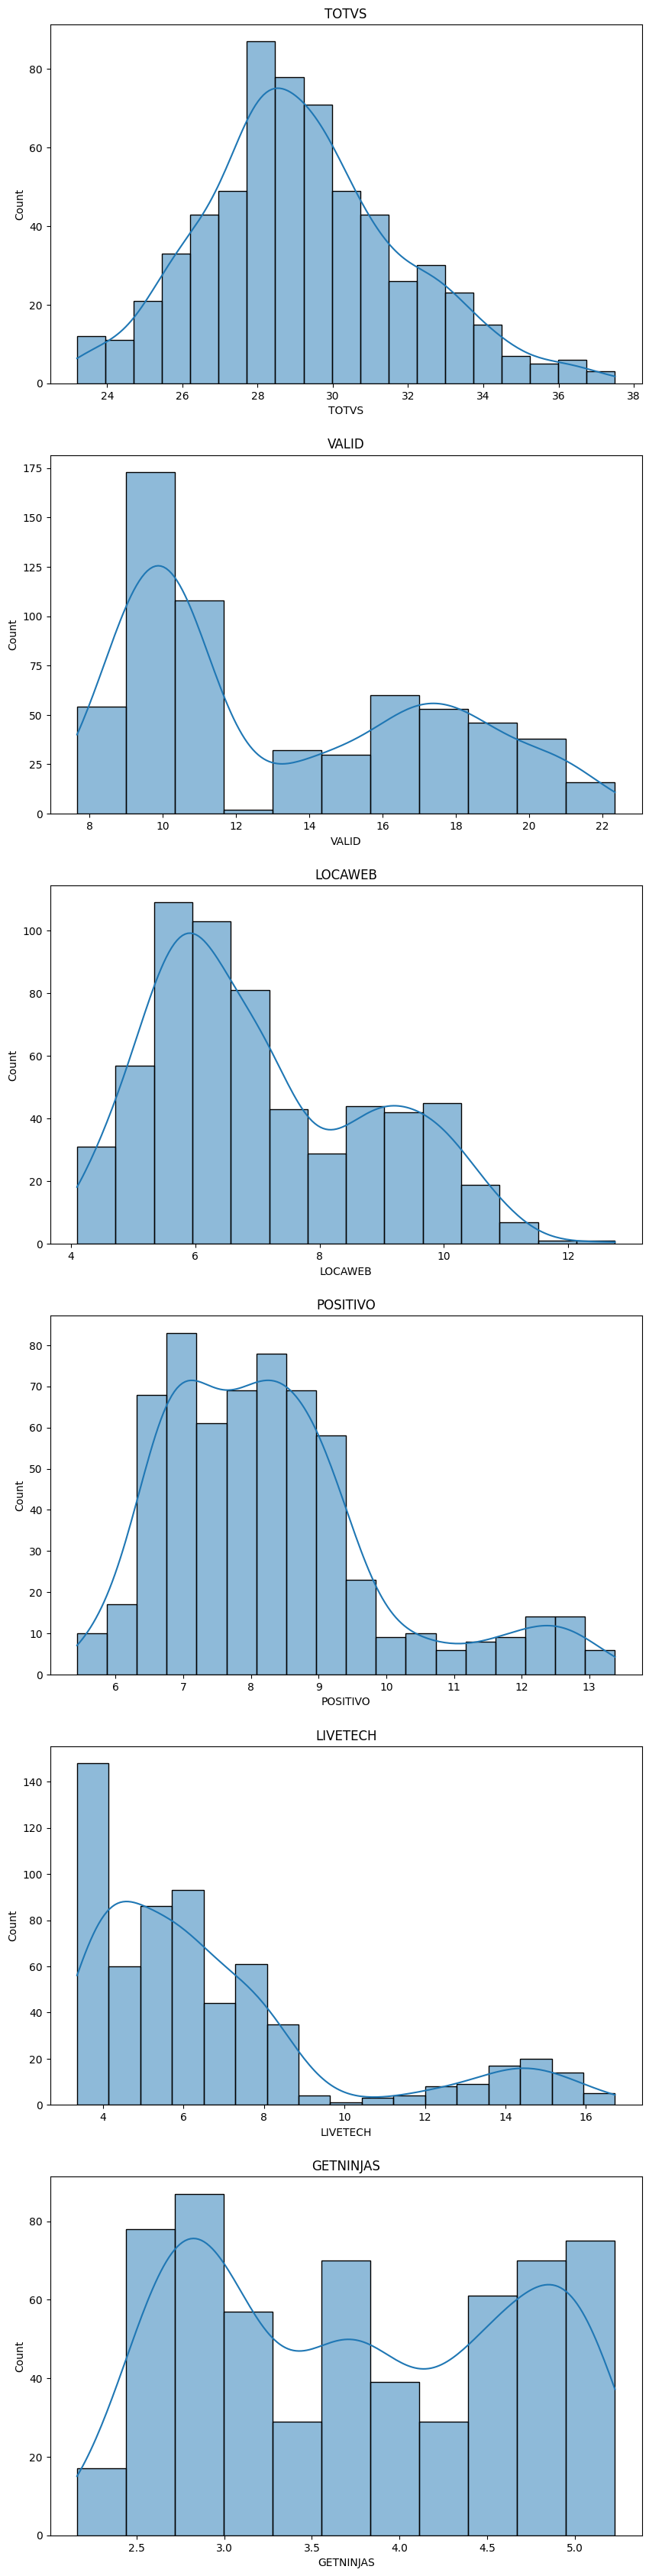

In [123]:
plt.figure(figsize=(10,50))
i = 1
for i in np.arange(1, len(acoes_df.columns)):
  plt.subplot(7, 1, i + 1)
  sns.histplot(acoes_df[acoes_df.columns[i]], kde = True)
  plt.title(acoes_df.columns[i])

In [124]:
acoes_df['TOTVS'].describe()

count    612.000000
mean      29.181291
std        2.673128
min       23.200001
25%       27.510000
50%       28.955000
75%       30.840000
max       37.500000
Name: TOTVS, dtype: float64

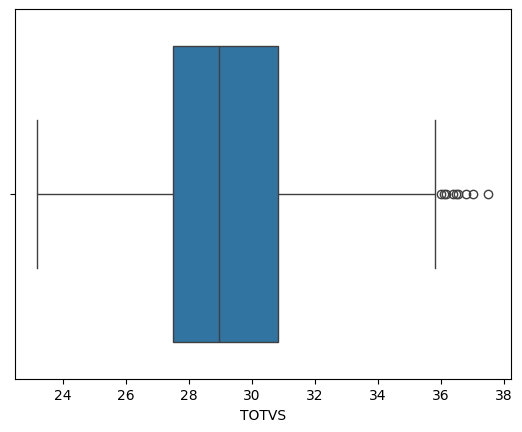

In [125]:
sns.boxplot(x = acoes_df['TOTVS']);

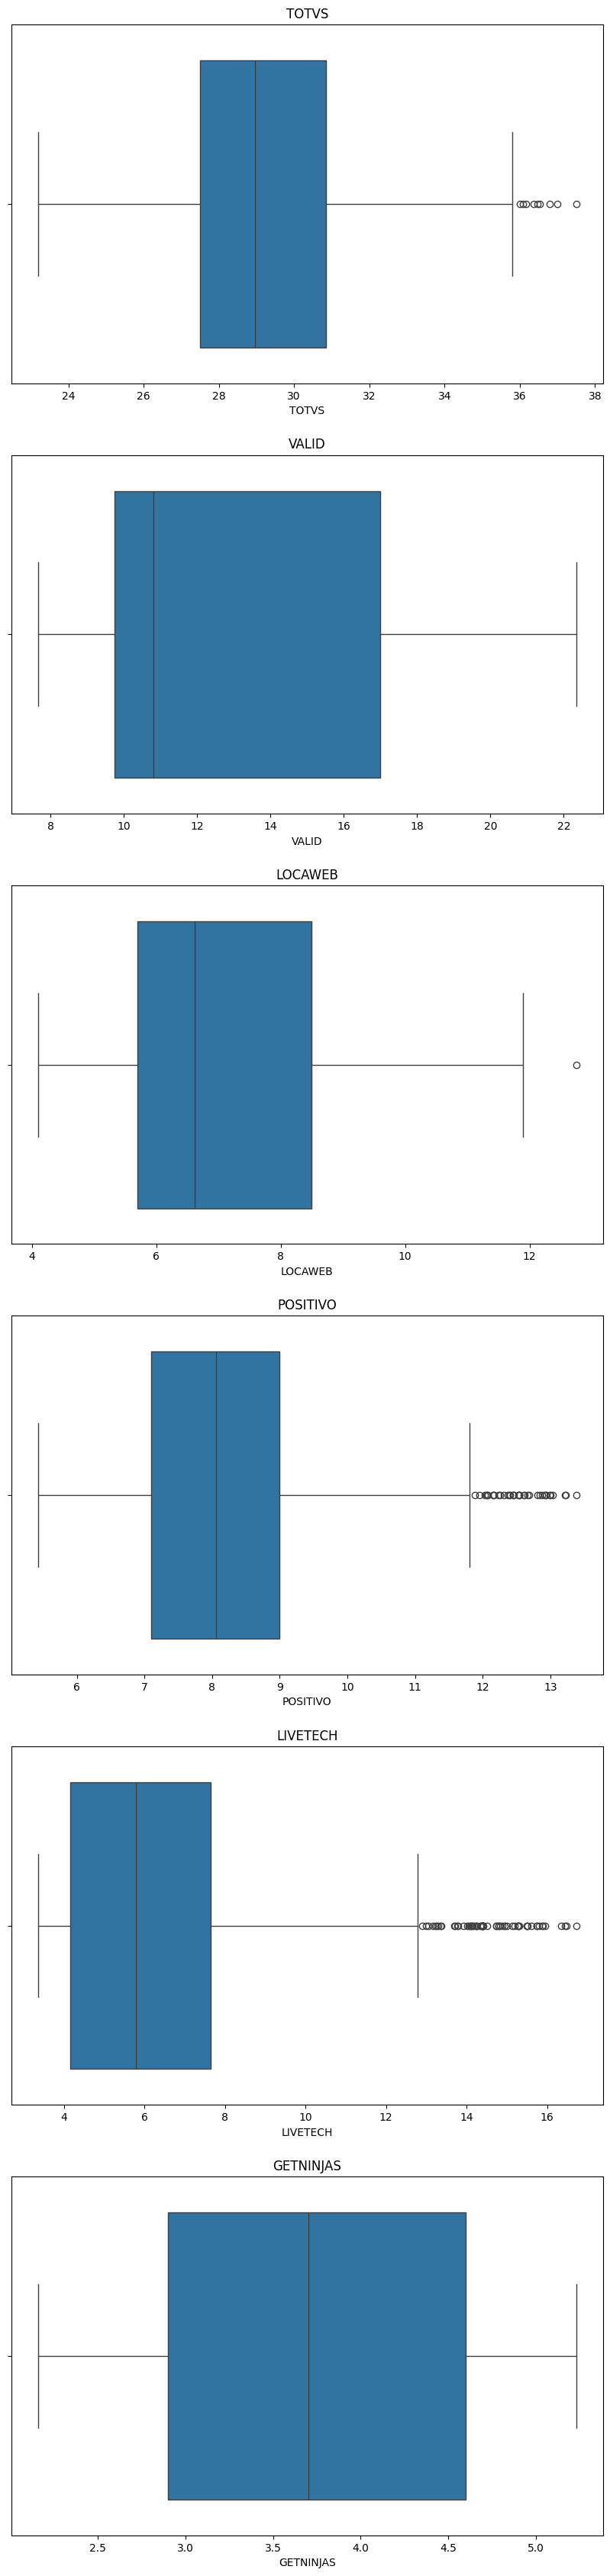

In [126]:
plt.figure(figsize=(10,50))
i = 1
for i in np.arange(1, len(acoes_df.columns)):
  plt.subplot(7, 1, i + 1)
  sns.boxplot(x = acoes_df[acoes_df.columns[i]])
  plt.title(acoes_df.columns[i])

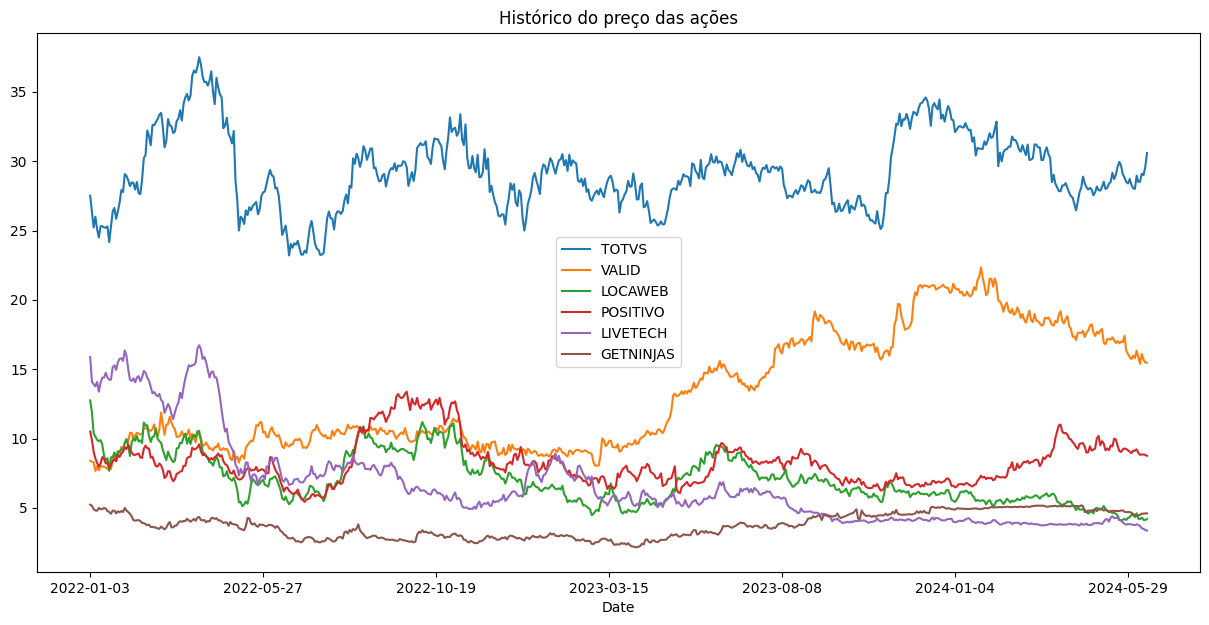

In [134]:
acoes_df.plot(x = 'Date', figsize = (15,7), title = 'Histórico do preço das ações');

In [128]:
acoes_df

,Date,TOTVS,VALID,LOCAWEB,POSITIVO,LIVETECH,GETNINJAS
0,2022-01-03,27.500000,8.40,12.75,10.50,15.891783,5.23
1,2022-01-04,26.389999,8.33,11.89,9.90,14.102708,5.15
2,2022-01-05,25.219999,8.28,10.37,9.04,13.912807,4.91
3,2022-01-06,26.000000,7.66,10.14,8.56,13.762884,4.81
4,2022-01-07,25.100000,8.00,9.91,8.24,14.082719,4.79
...,...,...,...,...,...,...,...
607,2024-06-10,28.540001,15.38,4.19,8.82,3.690000,4.50
608,2024-06-11,29.100000,16.10,4.30,8.85,3.520000,4.58
609,2024-06-12,29.000000,15.70,4.13,8.85,3.490000,4.58
610,2024-06-13,29.590000,15.47,4.12,8.82,3.390000,4.60


In [129]:
acoes_df_normalizado = acoes_df.copy()
for i in acoes_df_normalizado.columns[1:]:
  acoes_df_normalizado[i] = acoes_df_normalizado[i] / acoes_df_normalizado[i][0]

In [130]:
acoes_df_normalizado

,Date,TOTVS,VALID,LOCAWEB,POSITIVO,LIVETECH,GETNINJAS
0,2022-01-03,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,2022-01-04,0.959636,0.991667,0.932549,0.942857,0.887421,0.984704
2,2022-01-05,0.917091,0.985714,0.813333,0.860952,0.875472,0.938814
3,2022-01-06,0.945455,0.911905,0.795294,0.815238,0.866038,0.919694
4,2022-01-07,0.912727,0.952381,0.777255,0.784762,0.886164,0.915870
...,...,...,...,...,...,...,...
607,2024-06-10,1.037818,1.830952,0.328627,0.840000,0.232195,0.860421
608,2024-06-11,1.058182,1.916667,0.337255,0.842857,0.221498,0.875717
609,2024-06-12,1.054545,1.869048,0.323922,0.842857,0.219610,0.875717
610,2024-06-13,1.076000,1.841667,0.323137,0.840000,0.213318,0.879541


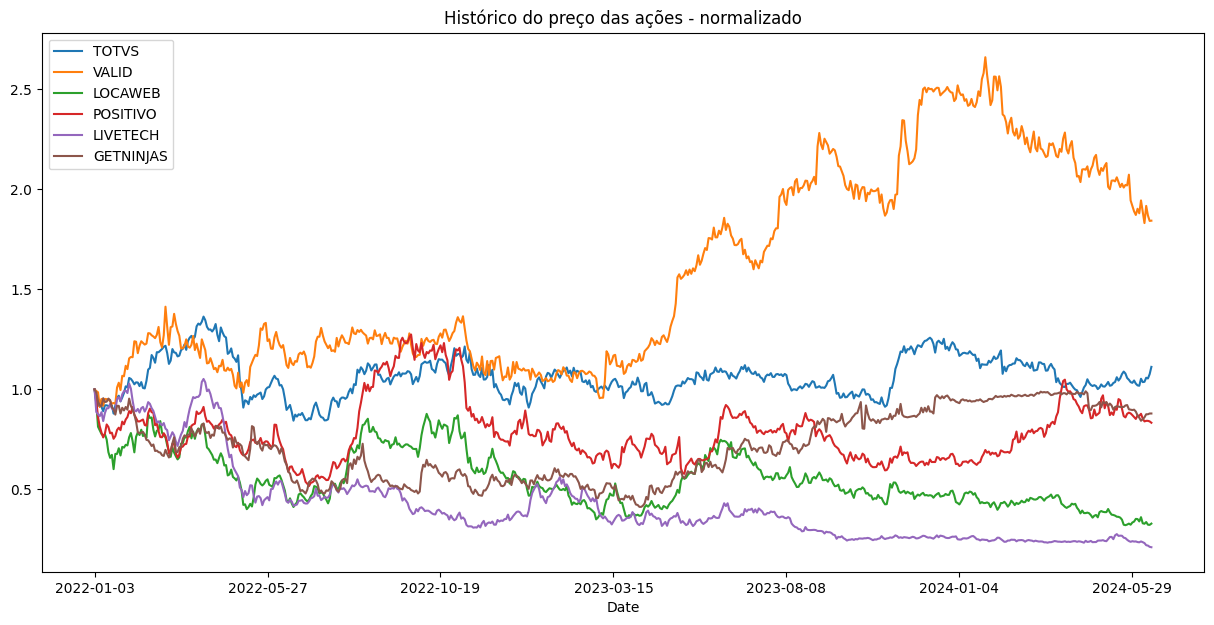

In [131]:
acoes_df_normalizado.plot(x = 'Date', figsize = (15,7), title = 'Histórico do preço das ações - normalizado');

In [132]:
figura = px.line(title = 'Histórico do preço das ações')
for i in acoes_df.columns[1:]:
  figura.add_scatter(x = acoes_df['Date'], y = acoes_df[i], name = i)
figura.show()

In [133]:
figura = px.line(title = 'Histórico do preço das ações - normalizado')
for i in acoes_df_normalizado.columns[1:]:
  figura.add_scatter(x = acoes_df_normalizado['Date'], y = acoes_df_normalizado[i], name = i)
figura.show()